# Overview

In this project, we will use a dataset containing the uber rides of a single user in 2016.
It consists of 1155 uber rides with details like start time, end time, miles, location, category, etc. 
We will perform exploratory data analysis (EDA) on this data to derive insights.

# How are We Going to Build This?

We will perform data preprocessing and feature engineering on the dataset to handle missing values and create new features.
Further, we will apply various descriptive statistics and data visualization techniques to identify underlying patterns and derive main insights.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

Let’s load the dataset in a pandas dataframe and explore variables and their data types.

In [3]:
df=pd.read_csv('UberDataset.csv')

In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.shape

(1156, 7)

In [6]:
# Let's explore variables, their data types, and total non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


1.As we can see, this dataset has 7 features, 6 objects (strings) and 1 numeric. These features represent start time, end time, category, start location, end location, miles, and purpose of the ride.<BR>
2.Maximum NULL values are present in the PURPOSE feature, and 1 NULL value is present in features END_DATE, CATEGORY, START, and STOP.

# Data Cleaning

In this step, we will remove inconsistent records and handle missing values. We will replace NULL values in the PURPOSE feature with the UNKNOWN string. 
We will drop one record containing a NULL value in remaining feature.

In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df['PURPOSE']=df['PURPOSE'].fillna('Unknown')

In [9]:
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Data Preprocessing

In this step, we will perform multiple preprocessing and feature engineering steps, as mentioned below -<br>
START_DATE and END_DATE to be converted into datetime format.<br>
Create a new feature representing the time of the day - morning, afternoon, evening, or night.<br>
Create a new feature representing the day of the week, such as Monday, Sunday, etc.<br>
Create a new feature representing the month of the ride, such as March, June, etc.<br>
We will calculate the duration of the ride by subtracting end time and start time of the ride.<br>

In [12]:
# converting START_DATE and END_DATE into datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

#create new feature/column representing time of the ride - morning, afternoon, evening, night

df['TIME_OF_DAY']= df['START_DATE'].apply(lambda i:i.hour)
df['TIME_OF_DAY'] = pd.cut(x=df['TIME_OF_DAY'], bins =[0,6,11,17,21,24],
                           labels = ['Night','Morning','Afternoon','Evening','Night'], ordered = False)

In [13]:
#create new feature representing month of the ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i:i.month)
month_label={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['MONTH_OF_THE_RIDE']=df['MONTH_OF_THE_RIDE'].map(month_label)

In [14]:
#create new feature representing day (week) of the ride
df['DAY_OF_THE_RIDE']=df['START_DATE'].apply(lambda i:i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY_OF_THE_RIDE']=df['DAY_OF_THE_RIDE'].map(day_label)

In [15]:
# duration of the ride
df['DURATION_OF_THE_RIDE']= (df['END_DATE']-df['START_DATE']).astype('timedelta64[m]')

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon,Jan,Wed,67.0


# Data Exploration

In [17]:
df.describe()

,MILES,DURATION_OF_THE_RIDE
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


Let’s explore summary statistics of the numerical features present in the dataset. As we can see , the mean miles of a ride are 10.56, and the mean duration of a ride is 23 minutes. <br>The maximum number of miles of a ride is 310, and the max duration of a ride is 336 minutes.

Let’s explore the minimum and max value of the START_DATE feature. As we can see below, this dataset contains rides for the entire year 2016.

In [18]:
print("min timestamp in START_TIME is - {}".format(df['START_DATE'].min()))
print("min timestamp in START_TIME is - {}".format(df['START_DATE'].max()))

min timestamp in START_TIME is - 2016-01-01 21:11:00
min timestamp in START_TIME is - 2016-12-31 22:08:00


There are four categorical features in the dataset - CATEGORY, START, STOP, and PURPOSE. Let’s explore the count of unique categories in each feature.

In [19]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].value_counts().count()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].value_counts().count()))
print("Total number of unique location in START - {}".format(df['START'].value_counts().count()))
print("Total number of unique location in STOP - {}".format(df['STOP'].value_counts().count()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


# Data Visualization

In this step, we will explore the data by using various visualization techniques. First, let’s explore the distribution of categories in CATEGORY and PURPOSE features and the top 10 locations for START and STOP.

**There are two categories for each ride - business and personal. Most of the rides (around 90%) belong to the business category.**

<AxesSubplot: xlabel='CATEGORY', ylabel='count'>

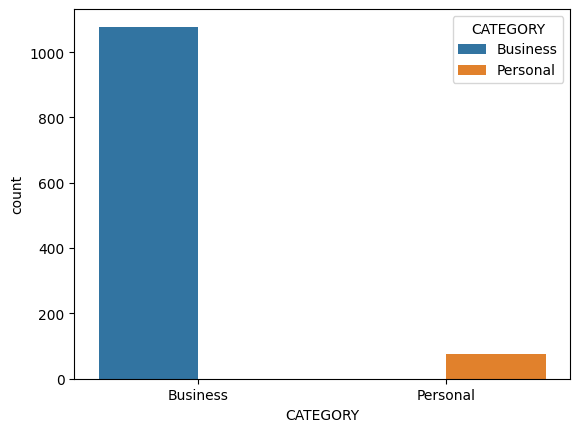

In [21]:


# label distribution for CATEGORY
sns.countplot(x='CATEGORY',data=df, hue='CATEGORY')



**Top 4 purposes of the ride are - meeting, meal/entertainment, errand/supplies, and customer visit.**

[Text(0, 0, 'Meal/Entertain'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Errand/Supplies'),
 Text(3, 0, 'Meeting'),
 Text(4, 0, 'Customer Visit'),
 Text(5, 0, 'Temporary Site'),
 Text(6, 0, 'Between Offices'),
 Text(7, 0, 'Charity ($)'),
 Text(8, 0, 'Commute'),
 Text(9, 0, 'Moving'),
 Text(10, 0, 'Airport/Travel')]

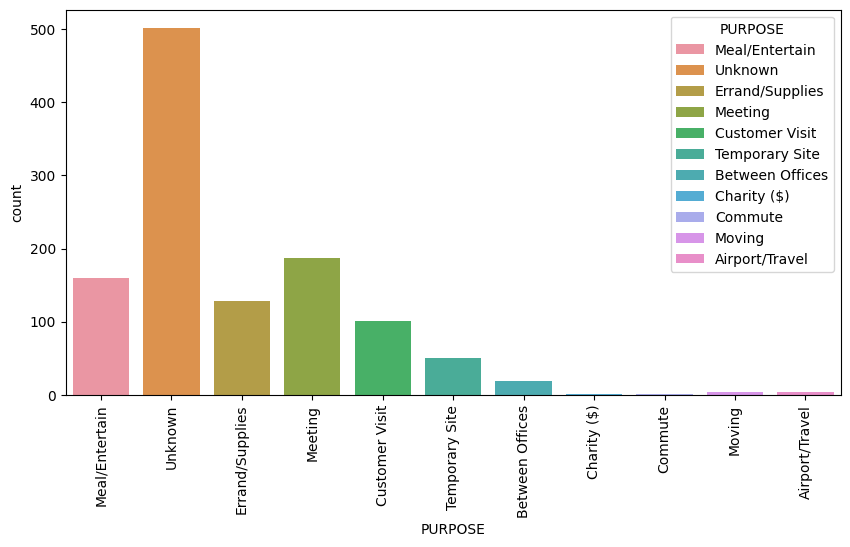

In [22]:
# label distribution for CATEGORY
plt.figure(figsize=(10,5))
chart = sns.countplot(x='PURPOSE',data=df, hue='PURPOSE',dodge=False)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

**Top 4 locations for both start and stop are - Cary, Morrisville, Whitebridge, and Islamabad.**

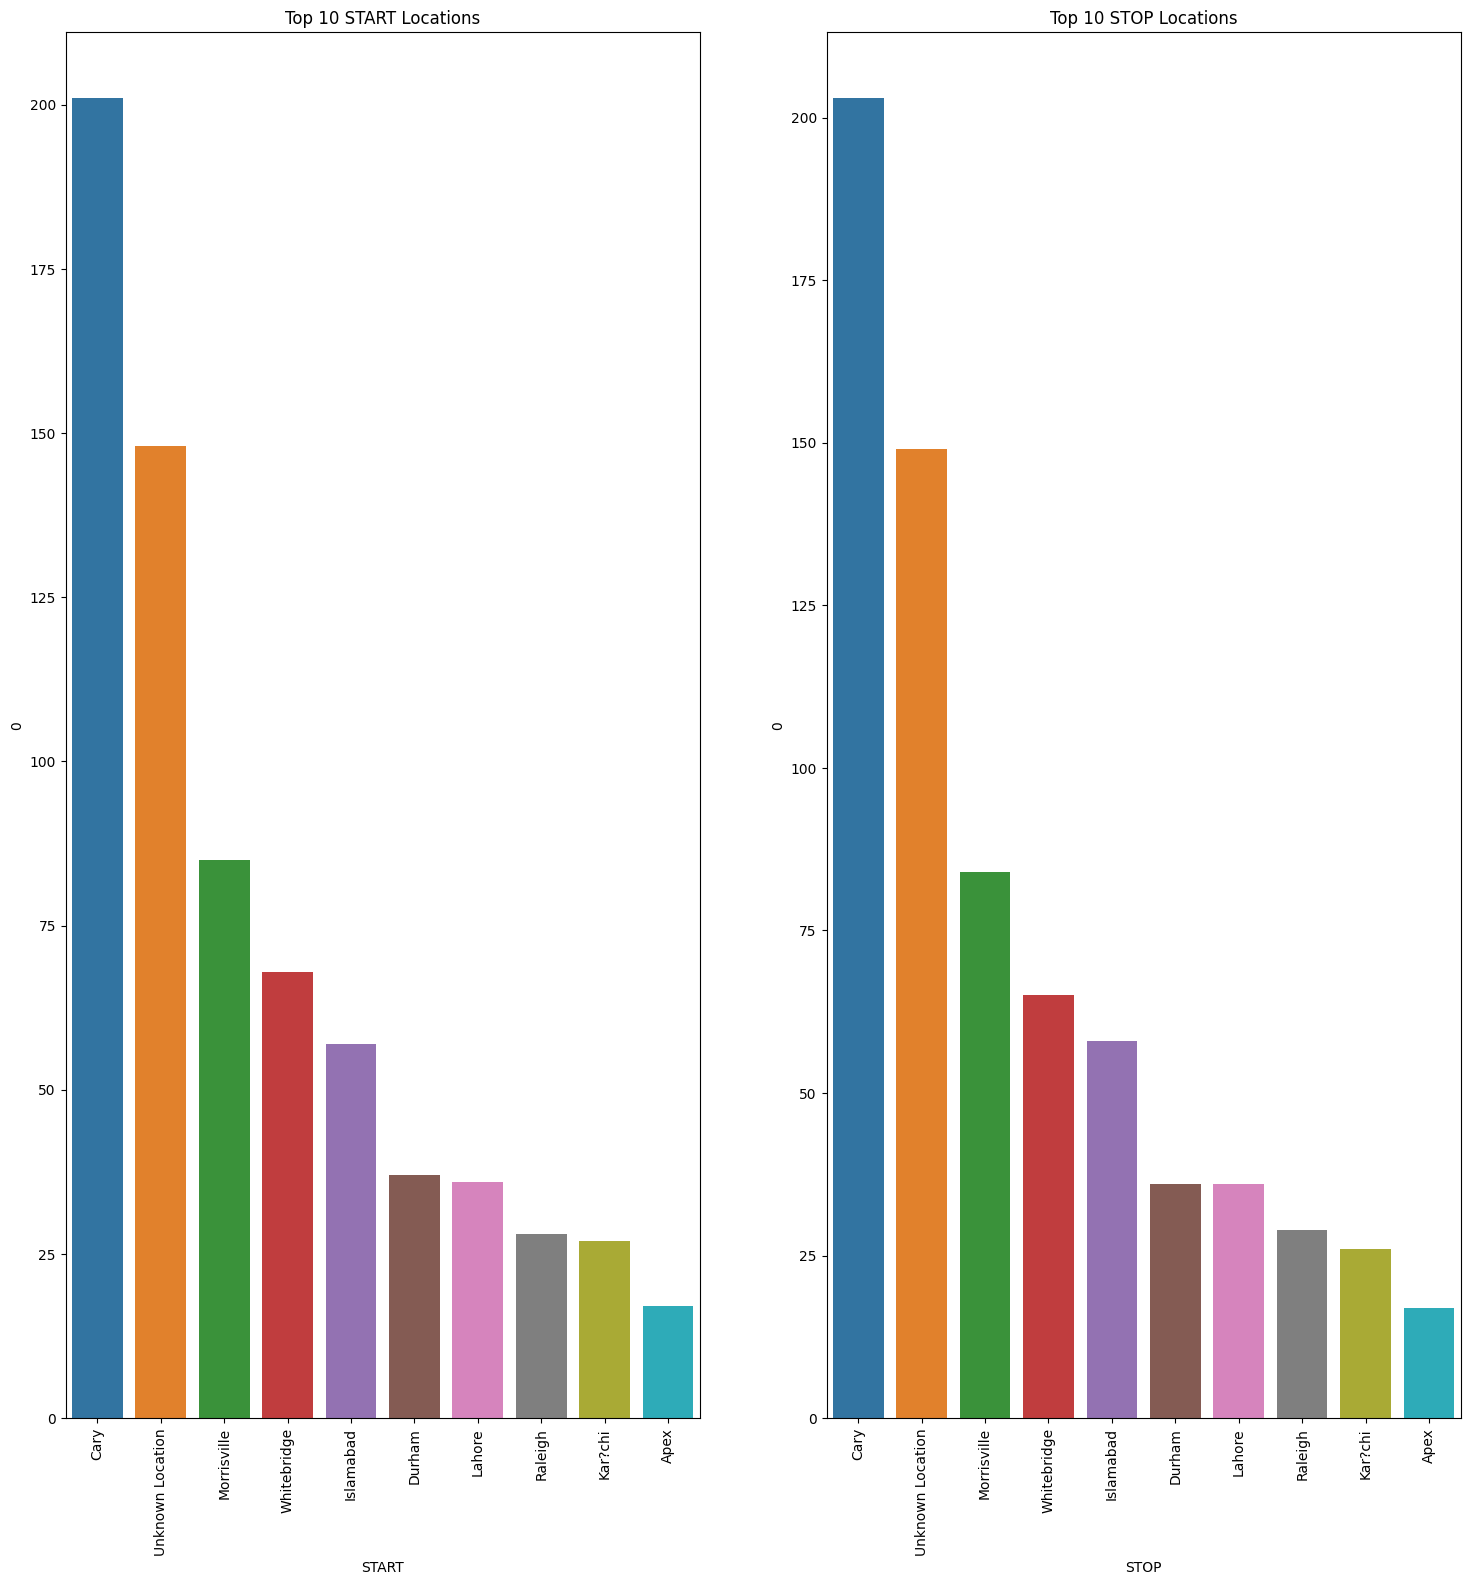

In [122]:
fig, axes = plt.subplots(1, 2, figsize = (18,18))


# top 10 locations for START and STOP
temp = pd.DataFrame(df.groupby('START').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'START', y = 0, data = temp, ax = axes[0])
axes[0].set_title('Top 10 START Locations')
axes[0].tick_params(axis='x', rotation = 90)

temp = pd.DataFrame(df.groupby('STOP').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'STOP', y = 0, data = temp, ax = axes[1])
axes[1].set_title('Top 10 STOP Locations')
axes[1].tick_params(axis='x', rotation = 90)

Let’s explore the count of the rides based on the time of the day. As we can see below, most of the rides are started during the afternoon, and the least number of rides are started at night.

<AxesSubplot: xlabel='TIME_OF_DAY', ylabel='count'>

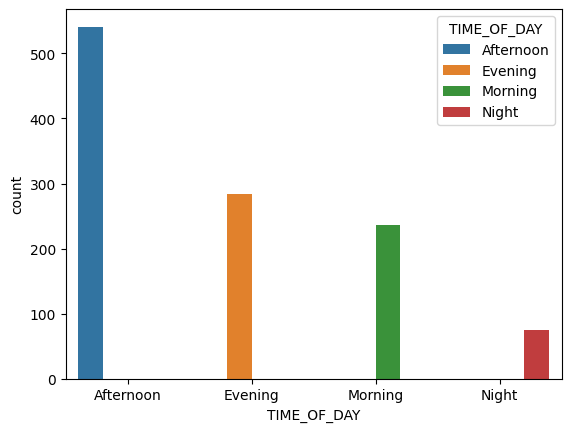

In [24]:
# distribution of rides based on time of the day
sns.countplot(x='TIME_OF_DAY',data=df, hue='TIME_OF_DAY')

Let’s explore the count of the rides based on the month of the day. As we can see below, most rides were completed during December, November, and August. A good number of rides are also distributed across Feb, March, June, and July. September has the least number of rides.

<AxesSubplot: xlabel='MONTH_OF_THE_RIDE', ylabel='count'>

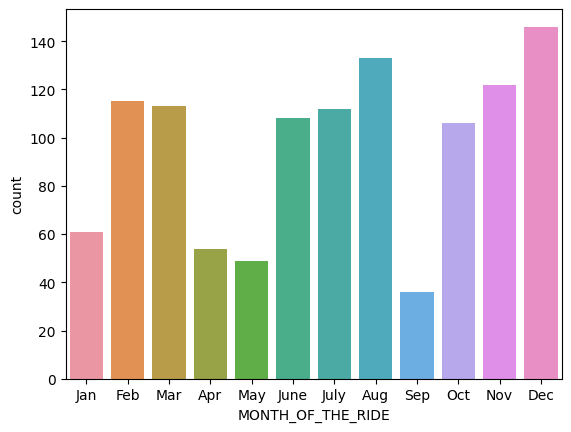

In [34]:
# distribution of rides based on month of the day
sns.countplot(x='MONTH_OF_THE_RIDE', data=df)


Let’s explore the count of the rides based on the day of the week. As we can see below, the maximum number of rides are requested on Friday, and Wednesday has the least number of rides.

<AxesSubplot: xlabel='DAY_OF_THE_RIDE', ylabel='count'>

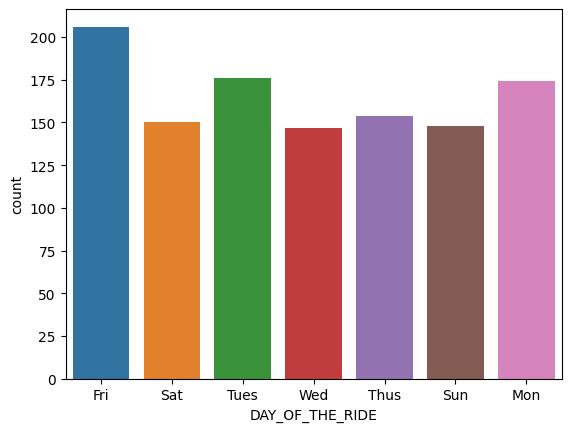

In [36]:
sns.countplot(x='DAY_OF_THE_RIDE',data=df)

Let’s explore the average duration of each ride based on the month. As we can see below, September has the highest average for the duration but has the least number of rides based on the previous explorations.

<AxesSubplot: xlabel='MONTH_OF_THE_RIDE', ylabel='DURATION_OF_THE_RIDE'>

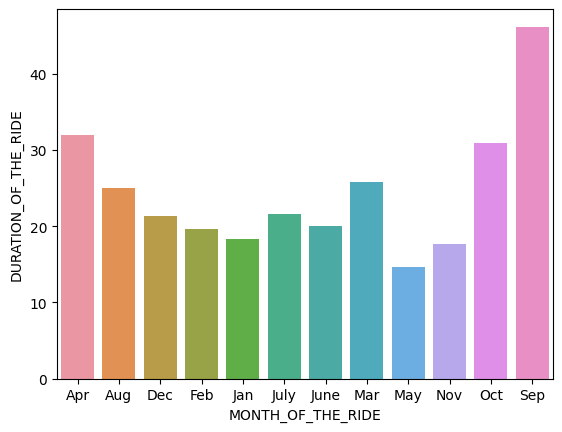

In [50]:

temp = df.groupby('MONTH_OF_THE_RIDE')['DURATION_OF_THE_RIDE'].mean().reset_index()
sns.barplot(x='MONTH_OF_THE_RIDE',y='DURATION_OF_THE_RIDE',data=temp)

In [42]:
temp

,MONTH_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,Apr,31.907407
1,Aug,24.984962
2,Dec,21.369863
3,Feb,19.695652
4,Jan,18.295082
5,July,21.589286
6,June,20.055556
7,Mar,25.743363
8,May,14.612245
9,Nov,17.680328


In [51]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon,Jan,Wed,67.0
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Night,Dec,Sat,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Afternoon,Dec,Sat,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Afternoon,Dec,Sat,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Evening,Dec,Sat,18.0
